# The Sparks Foundation - Data Sceince and Business Analytics
# Shalini Yadav¶

# Task 3 (Exploratory Data Analysis - Retail)

#  Import libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#  Loading Datasets

In [41]:
data=pd.read_csv("SampleSuperstore.csv")
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


# Data Inspection and Cleaning

In [42]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [43]:
data.corr()


,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [44]:
data.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [45]:
data.isna().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [46]:
data.isnull().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [47]:
#remove unneccesary column from data
data.drop(['Postal Code'],axis=1,inplace=True)

In [48]:
data


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


#  Exploratoey Data Analysis

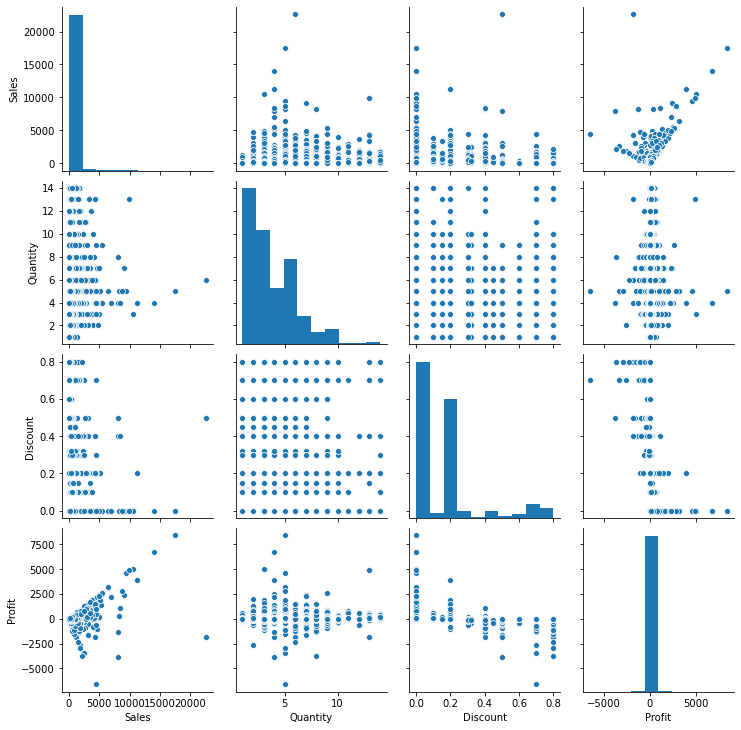

In [49]:
sns.pairplot(data)

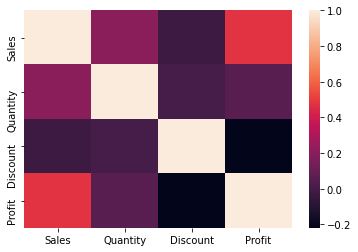

In [50]:
sns.heatmap(data.corr())


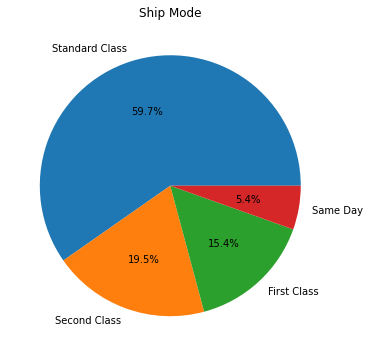

In [51]:
plt.figure(figsize=(6,6))
plt.title('Ship Mode')
plt.pie(data['Ship Mode'].value_counts(),labels=data['Ship Mode'].value_counts().index,autopct='%1.1f%%')
plt.show()

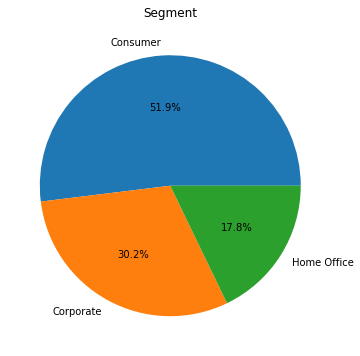

In [52]:
plt.figure(figsize=(6,6))
plt.title('Segment')
plt.pie(data['Segment'].value_counts(),labels=data['Segment'].value_counts().index,autopct='%1.1f%%')
plt.show()

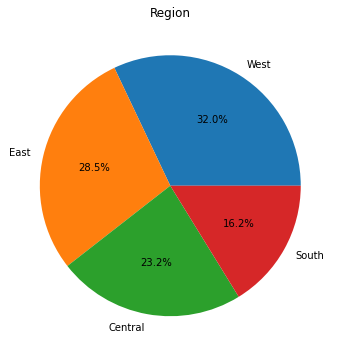

In [53]:
plt.figure(figsize=(6,6))
plt.title('Region')
plt.pie(data['Region'].value_counts(),labels=data['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()

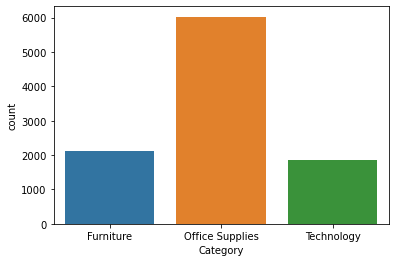

In [54]:
sns.countplot("Category",data=data)


Text(0.5, 1.0, 'Profit on diffrent Ship Modes')

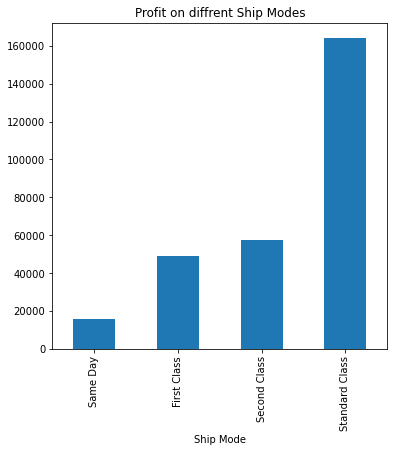

In [55]:
plt.figure(figsize=(6,6))
data.groupby('Ship Mode')['Profit'].sum().sort_values().plot.bar()
plt.title("Profit on diffrent Ship Modes")

Text(0.5, 1.0, 'Profit on diffrent Segments')

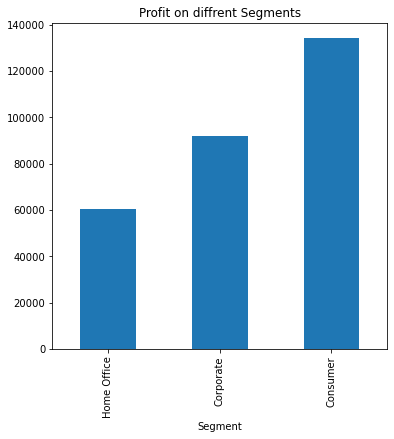

In [56]:
plt.figure(figsize=(6,6))
data.groupby('Segment')['Profit'].sum().sort_values().plot.bar()
plt.title("Profit on diffrent Segments")

Text(0.5, 1.0, 'Profit on diffrent Regions')

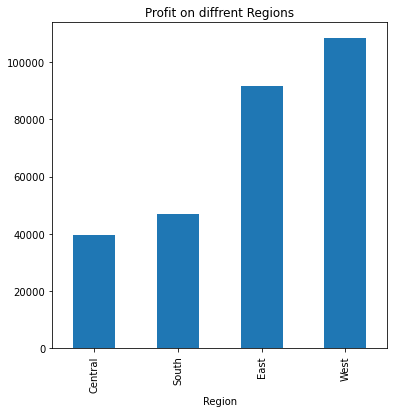

In [57]:
plt.figure(figsize=(6,6))
data.groupby('Region')['Profit'].sum().sort_values().plot.bar()
plt.title("Profit on diffrent Regions")

Text(0.5, 1.0, 'Profit on diffrent State')

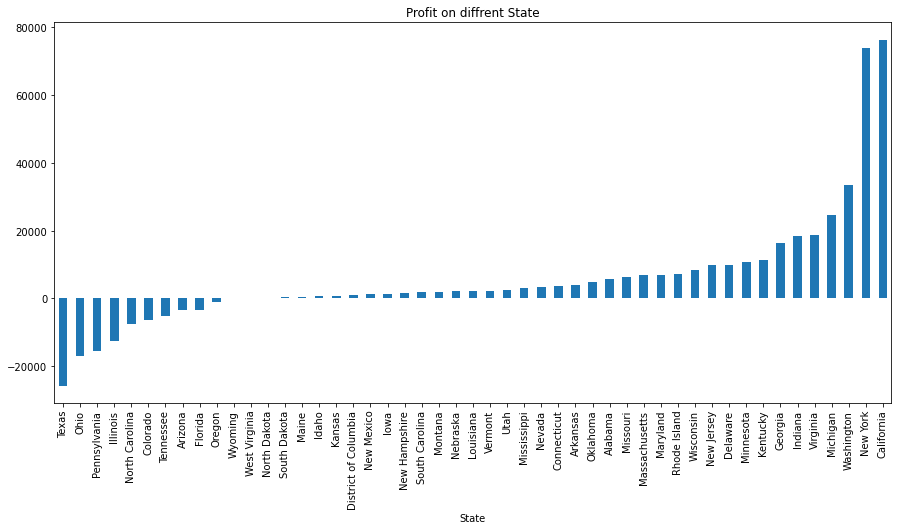

In [58]:
plt.figure(figsize=(15,7))
data.groupby('State')['Profit'].sum().sort_values().plot.bar()
plt.title("Profit on diffrent State")

<ipython-input-59-c0291edb3e5b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby("Sub-Category")['Sales','Profit'].sum().plot.bar(figsize=(20,10))


Text(0.5, 1.0, 'Top Sub-Category Sales vs Profit')

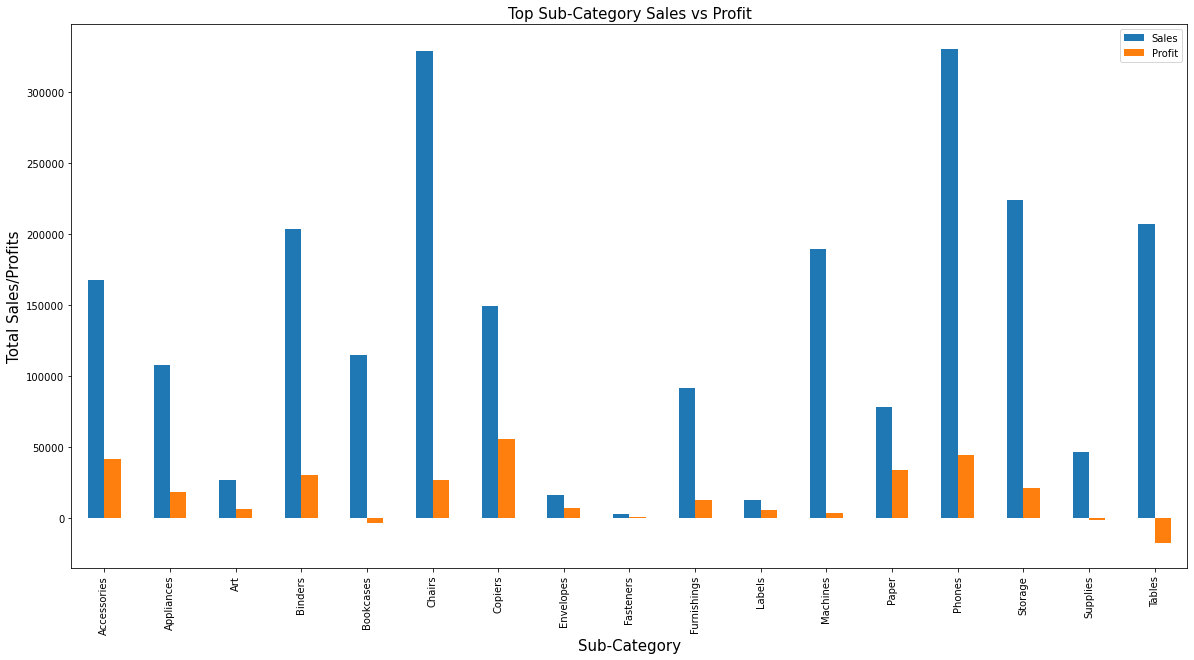

In [59]:
data.groupby("Sub-Category")['Sales','Profit'].sum().plot.bar(figsize=(20,10))
plt.xlabel('Sub-Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Sub-Category Sales vs Profit",fontsize = 15)

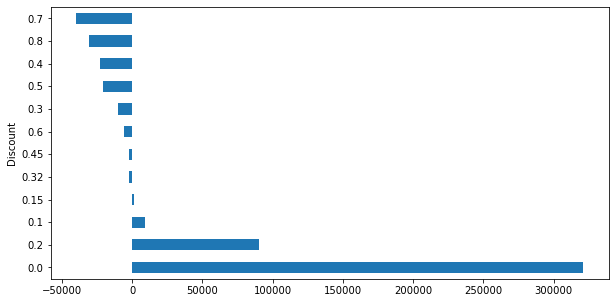

In [60]:
plt.figure(figsize=(10,5))
statewise = data.groupby(['Discount'])['Profit'].sum().nlargest(50)
statewise.plot.barh()

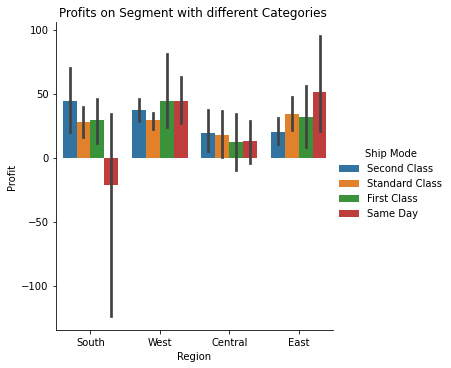

In [61]:
sns.catplot(x="Region", y="Profit", kind="bar",hue='Ship Mode', data=data)
plt.title('Profits on Segment with different Categories ')
plt.show()

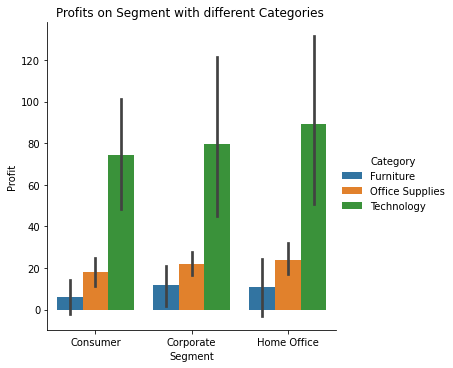

In [62]:
sns.catplot(x="Segment", y="Profit", kind="bar",hue='Category', data=data)
plt.title('Profits on Segment with different Categories ')
plt.show()

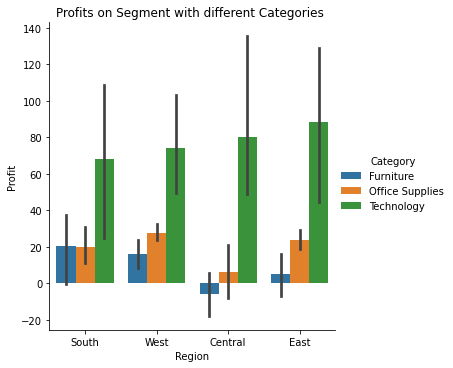

In [63]:
sns.catplot(x="Region", y="Profit", kind="bar",hue='Category', data=data)
plt.title('Profits on Segment with different Categories ')
plt.show()